In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../inputs/train-folds.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,kfold
0,21,Private,136873,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,10,United-States,<=50K,0
1,20,Private,194891,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K,0
2,43,Private,191712,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,1741,40,United-States,<=50K,0
3,35,State-gov,193241,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1651,40,United-States,<=50K,0
4,60,Private,127084,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,2042,34,United-States,<=50K,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
 15  kfold           32561 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


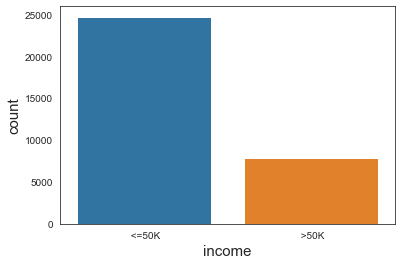

In [5]:
plt.figure(figsize=(6, 4))
sns.set_style(style="white")
b = sns.countplot("income", data=df)
b.set_xlabel("income", fontsize=15)
b.set_ylabel("count", fontsize=15)
plt.show()

**Clearly, unskewed cateogrical dataset, Stratified Kfold, AUC metric to be used**

In [6]:
df.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [7]:
7841/(7841+24720)

0.2408095574460244

**24% of total dataset has income >50k**

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
kfold             0
dtype: int64

###  there is spacing between each element of the income column

In [65]:
type(df.income[0]), df.income[0]

(str, ' <=50K')

In [66]:
df.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

### remove whitespacing in income column

In [ ]:
df["income"] = df.income.str.strip()

In [71]:
type(df.income[0]), df.income[0] ## Now, the spaces has been removed/

(str, '<=50K')

In [11]:
# numerical columns
num_cols = [
    "age",
    "fnlwgt",
    "capital-gain",
    "capital-loss",
    "hours-per-week"]

features = [x for x in df.columns if x not in num_cols and x not in ("kfold", "income")]
features

['workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [34]:
from sklearn import preprocessing

mapping_index = {
    ' <=50K' : 0,
    ' >50K' : 1
}
df.loc[:, "income"] = df.income.map(mapping_index)
for col in features:
    df.loc[:, col] = df[col].astype(str).fillna("NONE")
    
    lbl_enc = preprocessing.LabelEncoder()
    lbl_enc.fit(df[col])
    df.loc[:, col] = lbl_enc.transform(df[col])   

In [35]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,kfold
0,21,4,136873,7,1,4,2,3,4,1,0,0,10,33,0,0
1,20,4,194891,3,7,4,1,1,4,0,0,0,40,33,0,0
2,43,4,191712,15,10,4,1,1,4,1,0,1741,40,33,0,0
3,35,7,193241,3,7,2,8,0,4,1,0,1651,40,33,0,0
4,60,4,127084,3,7,2,3,0,4,1,0,2042,34,33,0,0


In [36]:
df['sex'].value_counts()

1    21790
0    10771
Name: sex, dtype: int64

In [37]:
df.groupby("sex")["income"].mean()

sex
0    0.109461
1    0.305737
Name: income, dtype: float64